In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('F:/DS/sonar.all-data.csv')
data.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [3]:
data.isna().sum()

0.0200    0
0.0371    0
0.0428    0
0.0207    0
0.0954    0
         ..
0.0180    0
0.0084    0
0.0090    0
0.0032    0
R         0
Length: 61, dtype: int64

### There are 60 features, from which we can predict whether the object is rock or mine

In [4]:
data['R'].value_counts()

M    111
R     96
Name: R, dtype: int64

In [5]:
data_R = data[data['R']=='R']
data_M = data[data['R']=='M']

In [6]:
data_R.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [7]:
data_M.head(5)

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
96,0.0491,0.0279,0.0592,0.1270,0.1772,0.1908,0.2217,0.0768,0.1246,0.2028,...,0.0081,0.0129,0.0161,0.0063,0.0119,0.0194,0.0140,0.0332,0.0439,M
97,0.1313,0.2339,0.3059,0.4264,0.4010,0.1791,0.1853,0.0055,0.1929,0.2231,...,0.0362,0.0210,0.0154,0.0180,0.0013,0.0106,0.0127,0.0178,0.0231,M
98,0.0201,0.0423,0.0554,0.0783,0.0620,0.0871,0.1201,0.2707,0.1206,0.0279,...,0.0191,0.0182,0.0160,0.0290,0.0090,0.0242,0.0224,0.0190,0.0096,M
99,0.0629,0.1065,0.1526,0.1229,0.1437,0.1190,0.0884,0.0907,0.2107,0.3597,...,0.0089,0.0262,0.0108,0.0138,0.0187,0.0230,0.0057,0.0113,0.0131,M
100,0.0335,0.0134,0.0696,0.1180,0.0348,0.1180,0.1948,0.1607,0.3036,0.4372,...,0.0244,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,M


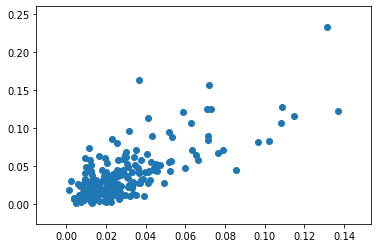

In [8]:
plt.scatter(data['0.0200'],data['0.0371'])

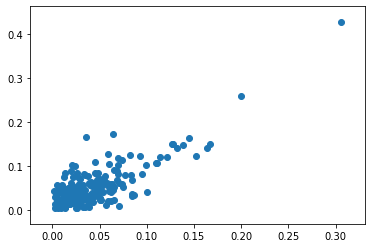

In [9]:
plt.scatter(data['0.0428'],data['0.0207'])

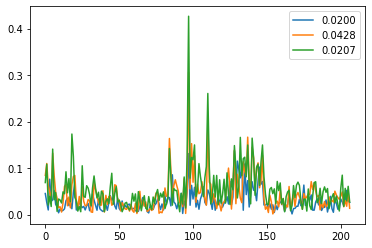

In [10]:
plt.plot(data['0.0200'], label='0.0200')
plt.plot(data['0.0428'], label='0.0428')
plt.plot(data['0.0207'], label='0.0207')
plt.legend()

In [11]:
from sklearn.model_selection import train_test_split
X=data.drop('R', axis=1)
y=data['R']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=29)

In [13]:
print(X_train.shape)
print(X_test.shape)

(165, 60)
(42, 60)


## Classification

### KNN

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier()

In [16]:
knn.fit(X=X_train, y=y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [17]:
knn.score(X_test, y_test)

0.7619047619047619

#### Accuracy: 76.2%

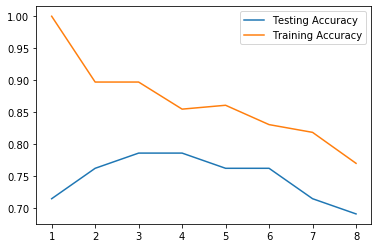

In [18]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_accuracy[i] = knn.score(X_train,y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.show()

#### Maximum accuracy is obtained when k=3 or 4

In [19]:
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X=X_train, y=y_train)
knn.score(X_test, y_test)

0.7857142857142857

#### Accuracy: 78.57%

In [20]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[23,  5],
       [ 4, 10]], dtype=int64)

#### 9 wrong predictions out of 42

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.85      0.82      0.84        28
           R       0.67      0.71      0.69        14

    accuracy                           0.79        42
   macro avg       0.76      0.77      0.76        42
weighted avg       0.79      0.79      0.79        42



### Decision Tree

In [22]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8095238095238095

#### Accuracy: 80.95%

In [23]:
from sklearn.metrics import confusion_matrix
y_pred = clf.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[26,  2],
       [ 6,  8]], dtype=int64)

#### 8 wrong predictions

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.81      0.93      0.87        28
           R       0.80      0.57      0.67        14

    accuracy                           0.81        42
   macro avg       0.81      0.75      0.77        42
weighted avg       0.81      0.81      0.80        42



### SVM

In [25]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.6428571428571429

In [26]:
from sklearn.metrics import confusion_matrix
y_pred = svm.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[21,  7],
       [ 8,  6]], dtype=int64)

In [27]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           M       0.72      0.75      0.74        28
           R       0.46      0.43      0.44        14

    accuracy                           0.64        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.64      0.64      0.64        42



#### Accuracy: 64.28%
#### 15 were predicted wrong out of 42

### Standardising data

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_p = scaler.fit_transform(X)
X_p

array([[ 0.70018948,  0.42042142,  1.0529498 , ..., -0.4709383 ,
        -0.44268846, -0.42246083],
       [-0.13089402,  0.59942737,  1.71912994, ...,  1.30656071,
         0.25299833,  0.25405324],
       [-0.83579208, -0.64754631,  0.48045125, ..., -0.54822087,
        -0.63683361,  1.03005467],
       ...,
       [ 1.00042384,  0.15949749, -0.67235266, ...,  0.90469137,
        -0.0382194 , -0.68112798],
       [ 0.0475061 , -0.09535845,  0.13434985, ..., -0.00724291,
        -0.70154866, -0.34287094],
       [-0.13959647, -0.06501846, -0.78685237, ..., -0.67187297,
        -0.2970796 ,  0.99025973]])

### PCA

In [29]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X_p)

In [30]:
print(pca.explained_variance_ratio_)

[2.03897950e-01 1.89405455e-01 8.56018085e-02 5.68862840e-02
 5.01317021e-02 4.05567677e-02 3.27272864e-02 3.03529373e-02
 2.57210787e-02 2.49016628e-02 2.07971452e-02 1.90546557e-02
 1.75405558e-02 1.54132664e-02 1.43177628e-02 1.35130771e-02
 1.23002112e-02 1.11555925e-02 1.03282502e-02 9.79584100e-03
 9.31755378e-03 8.82245274e-03 8.41377607e-03 7.75326916e-03
 7.24358160e-03 6.98525179e-03 6.05789229e-03 5.32915402e-03
 5.25475666e-03 4.92103776e-03 4.77289354e-03 4.36932921e-03
 3.68829839e-03 3.26860405e-03 3.09930505e-03 3.03922888e-03
 2.87559886e-03 2.44611335e-03 2.19463709e-03 2.06394408e-03
 1.85188563e-03 1.58641602e-03 1.34933280e-03 1.24743835e-03
 1.01715873e-03 9.48405524e-04 9.01965543e-04 7.07573125e-04
 5.59258464e-04 5.23852009e-04 4.82666208e-04 4.46857015e-04
 3.80233202e-04 3.55950060e-04 3.20623754e-04 2.68355115e-04
 2.48356050e-04 1.92144557e-04 1.87217896e-04 1.08340357e-04]


In [31]:
print(pca.singular_values_)

[50.32308163 48.50170877 32.60635616 26.5805878  24.95266999 22.44359719
 20.16117301 19.41606247 17.87332641 17.58632002 16.0717312  15.38371942
 14.759868   13.83592313 13.33516455 12.95501516 12.35996051 11.77083084
 11.32593784 11.03015617 10.75750984 10.46780125 10.22248007  9.8130323
  9.48500308  9.3143345   8.67404301  8.13560648  8.07861856  7.81788264
  7.69930762  7.36661855  6.76820996  6.37150393  6.20430244  6.14387685
  5.97619761  5.51187153  5.22086129  5.06302138  4.79587526  4.43883847
  4.09374076  3.93613825  3.55430885  3.43208342  3.34700046  2.96446592
  2.63552464  2.55073361  2.44841057  2.35583618  2.17313055  2.10259357
  1.99553176  1.8256425   1.75629785  1.54480918  1.52487582  1.1599945 ]


### KNN

In [33]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=1)
X_train_pca.shape

(165, 60)

In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X=X_train_pca, y=y_train_pca)
knn.score(X_test_pca, y_test_pca)

0.7857142857142857

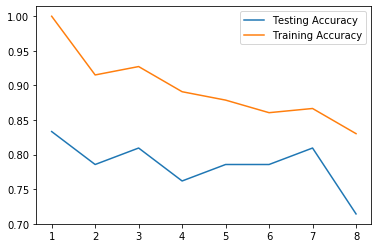

In [36]:
neighbors = np.arange(1,9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train_pca)
    train_accuracy[i] = knn.score(X_train_pca,y_train_pca)
    test_accuracy[i] = knn.score(X_test_pca, y_test_pca)
    
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training Accuracy')
plt.legend()
plt.show()

#### High accuracy when k=1

In [37]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X=X_train_pca, y=y_train_pca)
knn.score(X_test_pca, y_test_pca)

0.8333333333333334

In [38]:
from sklearn.metrics import confusion_matrix
y_pred_pca = knn.predict(X_test_pca)
confusion_matrix(y_test_pca, y_pred_pca)

array([[18,  2],
       [ 5, 17]], dtype=int64)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           M       0.78      0.90      0.84        20
           R       0.89      0.77      0.83        22

    accuracy                           0.83        42
   macro avg       0.84      0.84      0.83        42
weighted avg       0.84      0.83      0.83        42



#### Accuracy: 83.3%
#### 7 out of 42 wrong predictions

### Decision Tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_pca, y_train_pca)
clf.score(X_test_pca, y_test_pca)

0.7380952380952381

In [41]:
from sklearn.metrics import confusion_matrix
y_pred_pca = clf.predict(X_test_pca)
confusion_matrix(y_test_pca, y_pred_pca)

array([[15,  5],
       [ 6, 16]], dtype=int64)

In [42]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           M       0.71      0.75      0.73        20
           R       0.76      0.73      0.74        22

    accuracy                           0.74        42
   macro avg       0.74      0.74      0.74        42
weighted avg       0.74      0.74      0.74        42



#### Accuracy: 73.8%
#### 11 out of 42 wrong predictions

### SVM

In [43]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train_pca, y_train_pca)
svm.score(X_test_pca, y_test_pca)

F:\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.7857142857142857

In [44]:
from sklearn.metrics import confusion_matrix
y_pred_pca = svm.predict(X_test_pca)
confusion_matrix(y_test_pca, y_pred_pca)

array([[18,  2],
       [ 7, 15]], dtype=int64)

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pca, y_pred_pca))

              precision    recall  f1-score   support

           M       0.72      0.90      0.80        20
           R       0.88      0.68      0.77        22

    accuracy                           0.79        42
   macro avg       0.80      0.79      0.78        42
weighted avg       0.81      0.79      0.78        42



#### Accuracy: 78.57%
#### 9 out of 42 wrong predictions

| Algorithm | Accuracy (Normal) | Accuracy (PCA) | Wrong Predictions (Normal) | Wrong Predictions (PCA) |
|-----------|-------------------|----------------|----------------------------|-------------------------|
| KNN       | 78.5              | 83.3           | 9                          | 7                       |
| DT        | 80.95             | 73.8           | 8                          | 11                      |
| SVM       | 64.28             | 78.57          | 15                         | 9                       |

#### PCA worked well for KNN and SVM. KNN gave highest accuracy

### Clustering:

#### K means clustering

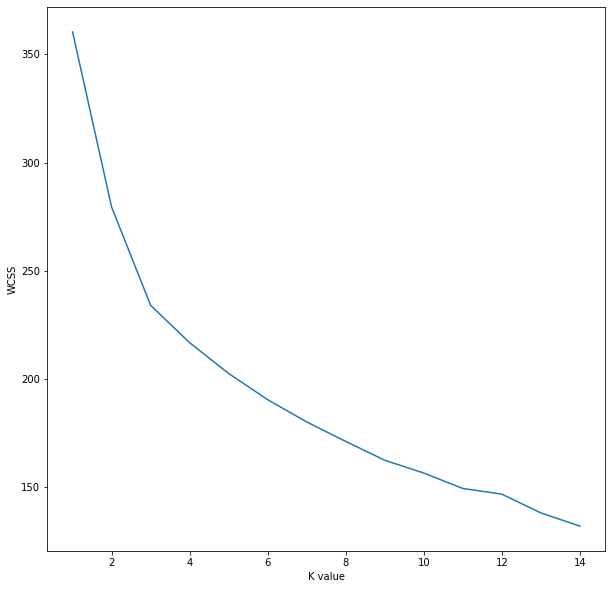

In [47]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1, 15):
    kmeansForLoop = KMeans(n_clusters = k)
    kmeansForLoop.fit(X)
    wcss.append(kmeansForLoop.inertia_)
    
plt.figure(figsize = (10, 10))
plt.plot(range(1, 15), wcss)
plt.xlabel("K value")
plt.ylabel("WCSS")
plt.show()

In [48]:
from sklearn.cluster import KMeans
df = data
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R


In [49]:
kmeans = KMeans(n_clusters=2)

In [50]:
kmeans.fit(df.drop('R',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [51]:
kmeans.cluster_centers_

array([[0.02864579, 0.03779439, 0.04126822, 0.04883738, 0.06392056,
        0.09755981, 0.11351682, 0.12714579, 0.16770093, 0.18768037,
        0.20404393, 0.2167271 , 0.22187757, 0.21631215, 0.21350093,
        0.24210935, 0.24810935, 0.27223551, 0.3177028 , 0.39362243,
        0.44999626, 0.46878879, 0.53154953, 0.60185327, 0.64268692,
        0.70347664, 0.72837009, 0.76918598, 0.75554112, 0.70446729,
        0.62146449, 0.54673738, 0.52293551, 0.51214953, 0.49587757,
        0.47786636, 0.43513551, 0.40635607, 0.38086916, 0.35524206,
        0.34373645, 0.32858692, 0.28539346, 0.24310748, 0.23435981,
        0.19656355, 0.13911402, 0.10273738, 0.05633551, 0.02097009,
        0.0163785 , 0.01384019, 0.01039626, 0.01025327, 0.00902617,
        0.00764206, 0.00762243, 0.00753832, 0.00819533, 0.00686355],
       [0.02981   , 0.039137  , 0.046586  , 0.059633  , 0.087072  ,
        0.112131  , 0.130231  , 0.142735  , 0.187697  , 0.23025   ,
        0.270971  , 0.28698   , 0.328828  , 0.3

In [52]:
def converter(cluster):
    if cluster=='R':
        return 1
    else:
        return 0

In [53]:
df['Cluster'] = df['R'].apply(converter)
df.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R,Cluster
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R,1
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R,1
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R,1
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R,1
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R,1


In [54]:
kmeans.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0])

In [55]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df['Cluster'],kmeans.labels_))
print(classification_report(df['Cluster'],kmeans.labels_))

[[53 58]
 [54 42]]
              precision    recall  f1-score   support

           0       0.50      0.48      0.49       111
           1       0.42      0.44      0.43        96

    accuracy                           0.46       207
   macro avg       0.46      0.46      0.46       207
weighted avg       0.46      0.46      0.46       207



#### Accuracy: 46%
#### 112 wrong predictions out of 207

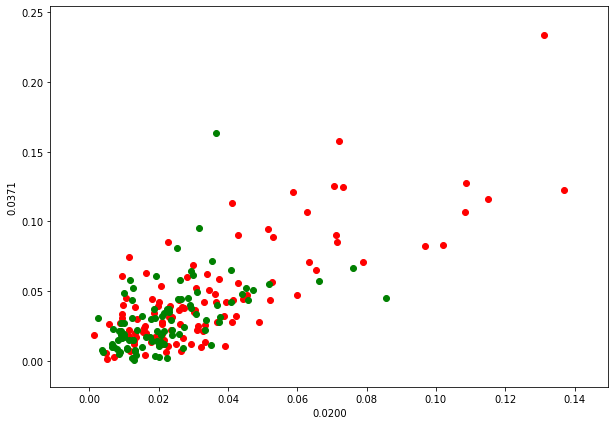

In [56]:
plt.figure(figsize = (10, 7))
plt.scatter(df['0.0200'][df["Cluster"] == 0], df["0.0371"][df["Cluster"] == 0],
color = "red")
plt.scatter(df["0.0200"][df["Cluster"] == 1], df["0.0371"][df["Cluster"] == 1],
color = "green")
plt.xlabel('0.0200')
plt.ylabel('0.0371')
plt.show()

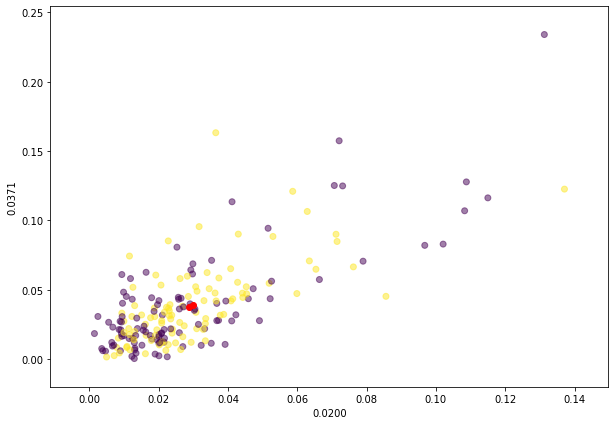

In [57]:
# plotting centroids
clusters = kmeans.fit_predict(X)
plt.figure(figsize = (10, 7))
plt.scatter(df["0.0200"], df["0.0371"], c = clusters, alpha = 0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color
= "red", alpha = 1)
plt.xlabel('0.0200')
plt.ylabel('0.0371')
plt.show()

### Hierarchical Clustering

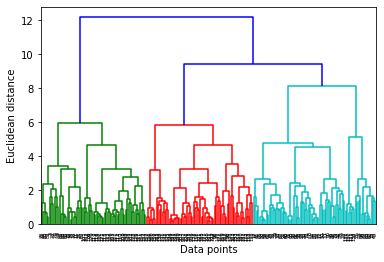

In [58]:
df_X = df.drop('R', axis=1)
from scipy.cluster.hierarchy import linkage, dendrogram
merg = linkage(df_X, method='ward')
dendrogram(merg, leaf_rotation = 90)
plt.xlabel('Data points')
plt.ylabel('Euclidean distance')
plt.show()

In [60]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = "euclidean", linkage = "ward")
cluster = hc.fit_predict(df_X)
df_X["label"] = cluster

In [61]:
df_X.label.value_counts()

0    142
1     65
Name: label, dtype: int64

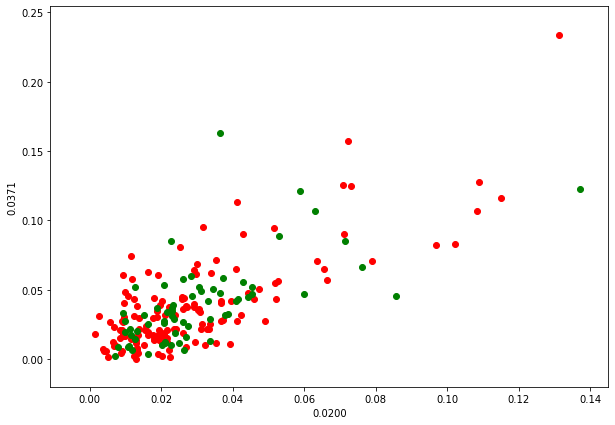

In [62]:
plt.figure(figsize = (10, 7))
plt.scatter(df_X['0.0200'][df_X["label"] == 0], df_X["0.0371"][df_X["label"] ==
0], color = "red")
plt.scatter(df_X["0.0200"][df_X["label"] == 1], df_X["0.0371"][df_X["label"] ==
1], color = "green")
plt.xlabel('0.0200')
plt.ylabel('0.0371')
plt.show()

In [63]:
def converter(cluster):
    if cluster=='R':
        return 1
    else:
        return 0
    
df_X['Cluster'] = df['R'].apply(converter)

from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(df_X['Cluster'],hc.labels_))
print(classification_report(df_X['Cluster'],hc.labels_))

[[72 39]
 [70 26]]
              precision    recall  f1-score   support

           0       0.51      0.65      0.57       111
           1       0.40      0.27      0.32        96

    accuracy                           0.47       207
   macro avg       0.45      0.46      0.45       207
weighted avg       0.46      0.47      0.45       207



#### Accuracy: 47%
#### 109 wrong predictions out of 207

### DBSCAN

In [64]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
X.head()

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0104,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062


In [65]:
X_ss = StandardScaler().fit_transform(X)

In [66]:
db = DBSCAN().fit(X_ss)
cluster_labels = db.labels_
num_clusters = len(set(cluster_labels))

In [67]:
cluster_labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1], dtype=int64)

In [68]:
num_clusters

1

#### Getting only 1 label in DBSCAN